In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [74]:
df_vehicles= pd.read_csv('../vehicles_us.csv')

In [75]:
df_vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


I am going to make sure the date is in datetime. I will change model_year, cylinders, odometer, is_4wd from float to int. I cannot do that unless I get rid the NaN values first. I am going to make sure all the NaN values in column is_4wd gets filled in with 0.I will also fill in NaN values in cylinders with the mean or median of the other rows in that column.The odometer will also need NaN values changed by the media of the rest of the rows. I will then check for duplicates and remove them. I will sort and organize the data so I can extract clear information. Lastly I will create histogram and scatterplots.

In [76]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [77]:
df_vehicles['date_posted'] = pd.to_datetime(df_vehicles['date_posted'])
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


I changed date_posted to date time. I will next groupby model and fill in missing values with median.

In [78]:
df_vehicles['model'].isna().sum()


0

In [79]:
df_vehicles[['model_year','cylinders','odometer']] = df_vehicles.groupby('model')[['model_year','cylinders','odometer']].transform(lambda x: x.fillna(x.median()))

In [80]:
df_vehicles = df_vehicles.dropna(subset=['odometer'])
df_vehicles['odometer'].isna().sum()

0

I will need to change all the NaN values in is_4wd to 0. That way 1 will mean yes and 0 means 0 making the column boolean.

In [81]:
df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(0)

I want to make sure I have no rows where there is NaN.

In [82]:
df_vehicles[['model_year','cylinders','odometer','is_4wd']].isna().sum()

model_year    0
cylinders     0
odometer      0
is_4wd        0
dtype: int64

I want to change the floats to integers

In [83]:
df_vehicles[['model_year','cylinders','odometer','is_4wd']] = df_vehicles[['model_year','cylinders','odometer','is_4wd']].astype(int)

I want to know if I have duplicate rows.

In [84]:
df_vehicles.duplicated().sum()

0

In [85]:
df_vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17


In [86]:
mode_paint_color = df_vehicles['paint_color'].mode()[0]
mode_paint_color

'white'

In [87]:
df_vehicles = df_vehicles.fillna('white')
df_vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,white,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17


I can create a new column with just the make of the car. It will be better for answering questions.
What is the average price of cars by model year?
what is the average price of cars by model or by type?
What is the distribution of prices across differen conditions?
How many cars by brand have over 100000 miles are still running?
Is there a difference between 4wd in terms of price?

<Axes: xlabel='model_year'>

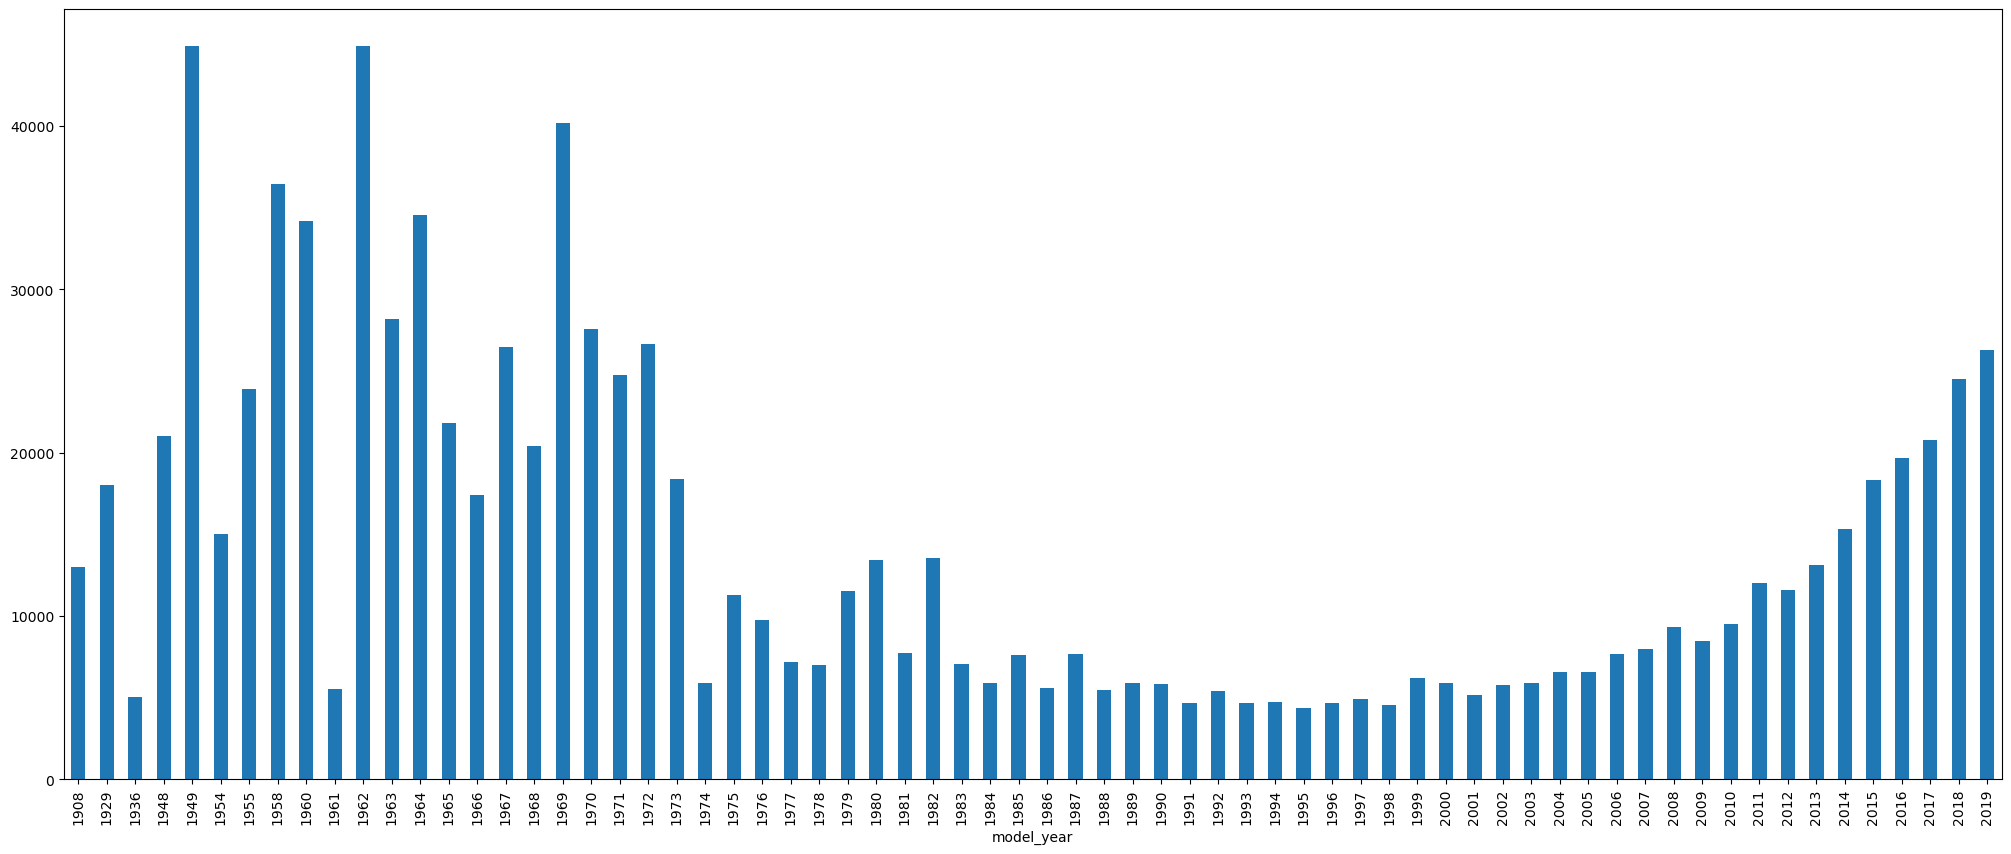

In [88]:
#average car price by year
df_year = df_vehicles.groupby('model_year')['price'].mean()
df_year.plot(kind = 'bar', figsize=(25,10))


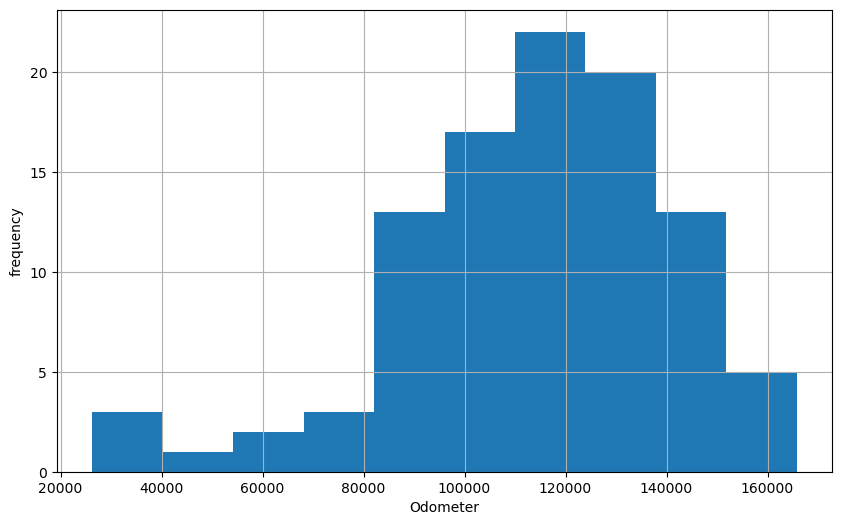

In [89]:
#average car price grouped by odometer
df_avg_price_miles = df_vehicles.groupby('model')['odometer'].mean()
df_avg_price_miles.hist(figsize=(10,6))
plt.xlabel('Odometer') 
plt.ylabel('frequency')
plt.show()
#use plotly for my graphs


In [90]:
#create a new column with just brand 
df_vehicles['brand'] = df_vehicles['model'].str.split().str.get(0)
df_vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,bmw
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,ford
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,white,0,2019-03-22,9,ford
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,chrysler
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,toyota
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,honda
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,white,1,2018-07-16,19,kia
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,honda


I can make a new column make and model!
What is avg price per brand. I can go further and group by model. 
median price of particular model. price for each model from the brand.

Scater plot color coded 

In [91]:
min_odometer = df_vehicles['odometer'].min()
min_odometer

0

In [92]:
max_odometer = df_vehicles['odometer'].max()
max_odometer

990000

In [93]:
brands = df_vehicles['brand'].unique()
brands

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'acura', 'cadillac', 'volkswagen', 'buick'], dtype=object)

In [94]:
brands = df_vehicles['brand'].unique()
selected_brand = st.selectbox('Select a brand', brands)

In [95]:
actual_range = list(range(0,990000))

In [ ]:
df_filtered = df_vehicles[ (df_vehicles.brand == selected_brand) & (df_vehicles.odometer.isin(list(actual_range)))]
df_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19,bmw
58,3200,2004,bmw x5,excellent,6,gas,108500,automatic,SUV,black,1,2019-04-09,10,bmw
87,8499,2009,bmw x5,good,6,gas,104482,automatic,SUV,blue,1,2019-03-04,52,bmw
204,22914,2015,bmw x5,excellent,6,gas,69686,automatic,SUV,white,1,2018-08-11,19,bmw
271,22914,2015,bmw x5,excellent,6,gas,69686,automatic,SUV,white,1,2018-07-07,9,bmw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50828,6000,2001,bmw x5,excellent,6,gas,153000,other,hatchback,white,1,2018-05-23,52,bmw
50837,2500,2010,bmw x5,good,6,gas,150000,automatic,SUV,black,1,2019-04-19,79,bmw
50851,23000,2012,bmw x5,like new,6,gas,1186,automatic,SUV,brown,0,2018-08-28,22,bmw
51143,4900,2006,bmw x5,excellent,6,gas,207000,automatic,truck,white,1,2019-01-13,52,bmw


In [99]:
df_filtered.cylinders.max()

8

In [101]:
df_vehicles.cylinders.min()

3